<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read in data</a></span></li><li><span><a href="#Create-sub-directories-for-another-dataset" data-toc-modified-id="Create-sub-directories-for-another-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create sub-directories for another dataset</a></span><ul class="toc-item"><li><span><a href="#Training-Set" data-toc-modified-id="Training-Set-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Training Set</a></span></li><li><span><a href="#Test-Set" data-toc-modified-id="Test-Set-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Test Set</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Custom-Model" data-toc-modified-id="Custom-Model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Custom Model</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Confusion Matrix</a></span></li></ul></li><li><span><a href="#VGG16" data-toc-modified-id="VGG16-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>VGG16</a></span></li><li><span><a href="#InceptionV3-freeze-conv-base" data-toc-modified-id="InceptionV3-freeze-conv-base-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>InceptionV3 freeze conv base</a></span></li><li><span><a href="#InceptionV3-Bottleneck-Features" data-toc-modified-id="InceptionV3-Bottleneck-Features-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>InceptionV3 Bottleneck Features</a></span><ul class="toc-item"><li><span><a href="#Predictions" data-toc-modified-id="Predictions-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Predictions</a></span></li></ul></li><li><span><a href="#Xception-free-conv-base" data-toc-modified-id="Xception-free-conv-base-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Xception free conv base</a></span></li><li><span><a href="#Xception-Bottleneck-Features" data-toc-modified-id="Xception-Bottleneck-Features-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Xception Bottleneck Features</a></span><ul class="toc-item"><li><span><a href="#Predictions" data-toc-modified-id="Predictions-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Predictions</a></span></li></ul></li><li><span><a href="#My-own-image-predictions" data-toc-modified-id="My-own-image-predictions-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>My own image predictions</a></span><ul class="toc-item"><li><span><a href="#Load-Model" data-toc-modified-id="Load-Model-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Load Model</a></span></li></ul></li></ul></div>


Below is an adaptation of the https://www.kaggle.com/orangutan/keras-vgg19-starter notebook.

In [1]:
import numpy as np 
import pandas as pd 
import keras
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras import models
from keras import optimizers 

import cv2
import os
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


/Users/559048/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<h1>Read in data</h1>

In [2]:
train = pd.read_csv('new_face_2/train_classes_wo.csv')

In [3]:
train.head()

,file,class
0,0002_1,NONE
1,0002_7,NONE
2,0005_16,NONE
3,0005_23,NONE
4,0006_001,NONE


In [4]:
test = pd.read_csv('new_face_2/test_classes_wo.csv')
test.head()

,file,class
0,0003_00000001,NONE
1,0004_1,NONE
2,0005_17,NONE
3,0007_003,NONE
4,0008_002,NONE


In [5]:
targets_series = pd.Series(train['class'])
one_hot = pd.get_dummies(targets_series, sparse = True)
one_hot

,NONE,PAIN
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [6]:
one_hot_labels = np.asarray(one_hot)

In [7]:
one_hot_labels

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [8]:
im_size = 500

In [9]:
x_train = []
y_train = []
x_test = []

In [10]:
i = 0 
for f, breed in tqdm(train.values):
    img = cv2.imread('new_face_2/train/{}.jpg'.format(f))
    label = one_hot_labels[i]
    x_train.append(cv2.resize(img, (im_size, im_size)))
    y_train.append(label)
    i += 1

100%|██████████| 730/730 [00:07<00:00, 97.78it/s] 


In [11]:
for f in tqdm(test['file'].values):
    img = cv2.imread('new_face_2/test/{}.jpg'.format(f))
    x_test.append(cv2.resize(img, (im_size, im_size)))

100%|██████████| 359/359 [00:03<00:00, 93.50it/s] 


In [12]:
#normalize
y_train_raw = np.array(y_train, np.uint8)
x_train_raw = np.array(x_train, np.float32) / 255.
x_test  = np.array(x_test, np.float32) / 255.

In [13]:
print(x_train_raw.shape)
print(y_train_raw.shape) #2 classes
print(x_test.shape)

(730, 500, 500, 3)
(730, 2)
(359, 500, 500, 3)


In [14]:
num_class = y_train_raw.shape[1]

In [15]:
num_class

2

In [16]:
y_test = []
#for y_test
i = 0 
for f, breed in tqdm(test.values):
    img = cv2.imread('new_face_2/test/{}.jpg'.format(f))
    label = one_hot_labels[i]
    y_test.append(label)
    i += 1

100%|██████████| 359/359 [00:02<00:00, 166.99it/s]


In [17]:
Y_test = np.array(y_test, np.uint8)

In [18]:
Y_test #use to run classification matrix against

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1,

In [19]:
#create a validation set - the validation score won't be so great at first b/c I need more data
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train_raw, y_train_raw, test_size=0.3, random_state=1)

In [ ]:
X_train

In [ ]:
X_valid

<h1>Create sub-directories for another dataset</h1>
<b>ONLY RUN THIS ONCE!</b>

So that I can use the "flow_from" command and augment the datasets.

In [ ]:
base_dir = './new_face_2/basedir'
os.mkdir(base_dir)

In [ ]:
#make a training_breeds
training_face_dir = os.path.join(base_dir, 'training_face_dir')
os.mkdir(training_face_dir)

In [ ]:
#make a test breeds
test_face_dir = os.path.join(base_dir, 'test_face_dir')
os.mkdir(test_face_dir)

In [24]:
training_dir = 'new_face_2/train' #original training data (no sub dirs)
testing_dir = 'new_face_2/test'

<h2>Training Set</h2>

In [25]:
train_path = os.path.abspath(training_dir)
print(train_path)
new_train_path = os.path.abspath(training_face_dir)
print(new_train_path)

/home/cordun/facial/new_face_2/train


NameError: name 'training_face_dir' is not defined

In [ ]:
train_path = train_path + '/'
new_train_path = new_train_path + '/'
print(train_path)
print(new_train_path)

In [ ]:
train.head()

In [ ]:
import shutil 

In [ ]:
#code courtesy https://www.kaggle.com/jeru666/dog-eat-dog-world-eda-useful-scripts
c = 0
for i in range(len(train)): #train is the df with the facial jpgs without .jpg and the label
    l = train['file'][i]
    for filename in os.listdir(train_path):	    
        f = filename[:-4] #train_path has filenames with .jpg so remove the last 4 chars
        if (l == f):
                c+=1
                if not os.path.exists(new_train_path + train['class'][i]):
                    os.makedirs(new_train_path + train['class'][i])
                    shutil.copy2(train_path + filename, new_train_path + train['class'][i])
                else:
                    shutil.copy2(train_path + filename, new_train_path + train['class'][i])

<h2>Test Set</h2>

In [ ]:
#Now do the same thing for the test set 
test_path = os.path.abspath(testing_dir)
print(test_path)
new_test_path = os.path.abspath(test_face_dir)
print(new_test_path)

In [ ]:
test_path = test_path + '/'
new_test_path = new_test_path + '/'
print(test_path)
print(new_test_path)

In [ ]:
test.head()

In [ ]:
#code courtesy https://www.kaggle.com/jeru666/dog-eat-dog-world-eda-useful-scripts
c = 0
for i in range(len(test)): #test is the df with the facial jpgs without .jpg and the label
    l = test['file'][i]
    for filename in os.listdir(test_path):	    
        f = filename[:-4] #test_path has filenames with .jpg so remove the last 4 chars
        if (l == f):
                c+=1
                if not os.path.exists(new_test_path + test['class'][i]):
                    os.makedirs(new_test_path + test['class'][i])
                    shutil.copy2(test_path + filename, new_test_path + test['class'][i])
                else:
                    shutil.copy2(test_path + filename, new_test_path + test['class'][i])

<h1>Model</h1>

In [27]:
training_face_dir = '/home/cordun/facial/new_face_2/basedir/training_face_dir'
test_face_dir = '/home/cordun/facial/new_face_2/basedir/test_face_dir'

<h2>Custom Model</h2>

In [43]:
from keras import layers
from keras import models
from keras import optimizers 

im_size = 500 

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(im_size, im_size, 3))) 

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((5,5)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.1))

model.add(layers.Dense(2, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='binary_crossentropy', 
              optimizer='sgd',
              metrics=['acc'])

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 498, 498, 32)      896       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 496, 496, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 248, 248, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 246, 246, 128)     73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 307328)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 307328)            0         
__________

In [30]:
from keras.preprocessing.image import ImageDataGenerator

In [38]:
im_size = 500 

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(training_face_dir,
                                                    target_size=(im_size, im_size),
                                                    batch_size=20,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_face_dir,
                                                  target_size=(im_size, im_size),
                                                  batch_size=20,
                                                  class_mode='categorical')

Found 727 images belonging to 2 classes.
Found 359 images belonging to 2 classes.


In [46]:
#i don't have enough data right now for a validation generator, so subbing in the test set
history = model.fit_generator(train_generator, 
                              steps_per_epoch=50,
                              epochs= 10,
                              validation_data = test_generator,
                              validation_steps=50)

Epoch 1/5
50/50 [==============================] - 26s 523ms/step - loss: 0.3869 - acc: 0.8427 - val_loss: 0.3578 - val_acc: 0.8649
Epoch 2/5
50/50 [==============================] - 27s 533ms/step - loss: 0.3832 - acc: 0.8311 - val_loss: 0.3827 - val_acc: 0.8412
Epoch 3/5
50/50 [==============================] - 27s 541ms/step - loss: 0.3723 - acc: 0.8391 - val_loss: 0.3441 - val_acc: 0.8663
Epoch 4/5
50/50 [==============================] - 27s 536ms/step - loss: 0.3774 - acc: 0.8340 - val_loss: 0.3684 - val_acc: 0.8496
Epoch 5/5
50/50 [==============================] - 27s 534ms/step - loss: 0.3357 - acc: 0.8545 - val_loss: 0.4018 - val_acc: 0.8148


In [48]:
score = model.evaluate_generator(test_generator)
print(score)

[0.40179355894954755, 0.8147632360126315]


In [47]:
from keras.models import load_model

model.save('custom_binary_set_10epochs.h5') 
#model = keras.models.load_model('saved_models/rnn_1.h5') 

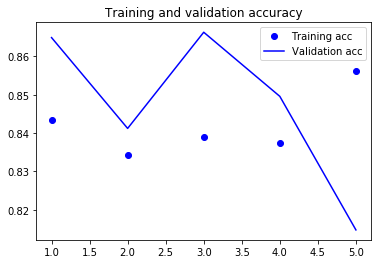

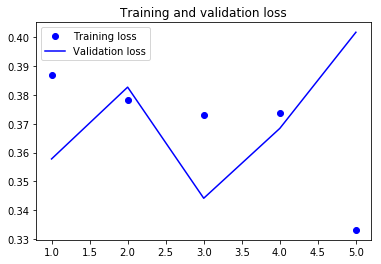

In [49]:
#loss and accuracy curves

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<h2>Confusion Matrix</h2>

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns 

def confusion_matrix_maker(model,Y_test_classes,Y_test_true_classes):
    cm = confusion_matrix(Y_test_classes, Y_test_true_classes)

    sns.set_style('ticks')
    fig, ax = plt.subplots()

    # size of inches
    fig.set_size_inches(11, 8)

    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()   

In [51]:
#predict on X_test
test_probs = model.predict_generator(test_generator)

In [52]:
test_probs

array([[0.99693215, 0.00309668],
       [0.8064574 , 0.19453403],
       [0.95636684, 0.04269852],
       [0.44665834, 0.55555946],
       [0.83874226, 0.17255403],
       [0.50658953, 0.49441704],
       [0.94527495, 0.05416715],
       [0.57629883, 0.43815276],
       [0.98997736, 0.01075494],
       [0.9579676 , 0.04554701],
       [0.60906905, 0.3998113 ],
       [0.35596564, 0.65001863],
       [0.9948455 , 0.00505846],
       [0.9925316 , 0.00730185],
       [0.5402471 , 0.46249518],
       [0.62067586, 0.37221593],
       [0.9804731 , 0.01964511],
       [0.4968659 , 0.5138205 ],
       [0.6964387 , 0.29168752],
       [0.92214566, 0.07832025],
       [0.99105084, 0.00906588],
       [0.9965024 , 0.00317287],
       [0.3797894 , 0.6214171 ],
       [0.9946148 , 0.00545259],
       [0.585455  , 0.42677268],
       [0.99285924, 0.00791644],
       [0.68289673, 0.3314825 ],
       [0.18315932, 0.81730425],
       [0.92604446, 0.07443243],
       [0.9965276 , 0.00360108],
       [0.

In [53]:
#confusion matrix
Y_test_classes = test_probs.argmax(axis=-1) #selects the one with the greatest probability
print(Y_test_classes)

[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0
 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0
 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1
 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1]


In [56]:
Y_test_true_classes = Y_test.argmax(axis=-1)
Y_test_true_classes 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,

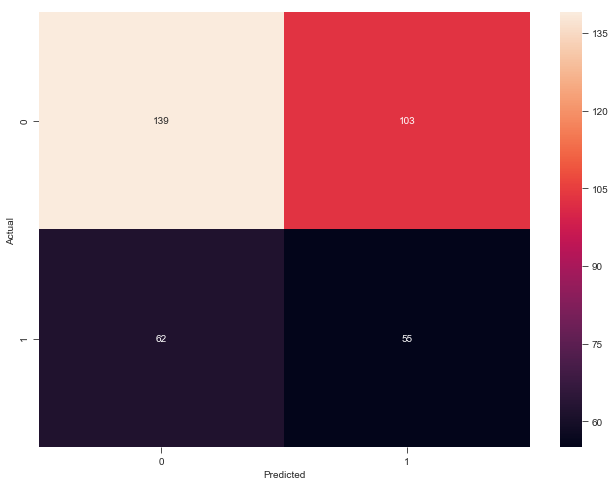

In [63]:
confusion_matrix_maker(model,Y_test_classes,Y_test_true_classes)

In [61]:
print(sklearn.metrics.classification_report(Y_test_classes, Y_test_true_classes, target_names = ['0', '1']))

             precision    recall  f1-score   support

          0       0.69      0.57      0.63       242
          1       0.35      0.47      0.40       117

avg / total       0.58      0.54      0.55       359



<h1>VGG16</h1>

- The VGG network architecture was introduced by Simonyan and Zisserman in their 2014 paper, Very Deep Convolutional Networks for Large Scale Image Recognition.
- The “16” and “19” stand for the number of weight layers in the network 
- It is painfully slow to train.
- The network architecture weights themselves are quite large (in terms of disk/bandwidth).
-  VGG is over 533MB for VGG16 and 574MB for VGG19

In [64]:
from keras.applications import VGG16

In [65]:
conv_base = VGG16(weights='imagenet', 
                 include_top = False,
                 input_shape = (im_size,im_size,3))

In [78]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((5,5)))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='sigmoid'))

In [79]:
#freeze them
conv_base.trainable = False

In [80]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip = True,
    fill_mode='nearest')

In [81]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip = True,
    fill_mode='nearest')

In [82]:
train_generator = train_datagen.flow_from_directory(training_face_dir,
                                                    target_size=(im_size, im_size),
                                                    batch_size=20,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_face_dir,
                                                  target_size=(im_size, im_size),
                                                  batch_size=20,
                                                  class_mode='categorical')

Found 727 images belonging to 2 classes.
Found 359 images belonging to 2 classes.


In [83]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.sgd(lr=0.0001),
              metrics=['acc'])

In [84]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=5,
    validation_data = test_generator,
    validation_steps = 50)

Epoch 1/5
50/50 [==============================] - 90s 2s/step - loss: 0.7689 - acc: 0.4935 - val_loss: 0.7268 - val_acc: 0.4833
Epoch 2/5
50/50 [==============================] - 78s 2s/step - loss: 0.7198 - acc: 0.4834 - val_loss: 0.7086 - val_acc: 0.4916
Epoch 3/5
50/50 [==============================] - 78s 2s/step - loss: 0.7114 - acc: 0.4661 - val_loss: 0.7022 - val_acc: 0.4889
Epoch 4/5
50/50 [==============================] - 79s 2s/step - loss: 0.7014 - acc: 0.4932 - val_loss: 0.7010 - val_acc: 0.4986
Epoch 5/5
50/50 [==============================] - 79s 2s/step - loss: 0.7108 - acc: 0.4487 - val_loss: 0.7032 - val_acc: 0.4944


In [86]:
score = model.evaluate_generator(test_generator)
print(score)

[0.7046636387830325, 0.4930362105369568]


In [87]:
model.save('VGG16_binary_set_5epochs.h5') 

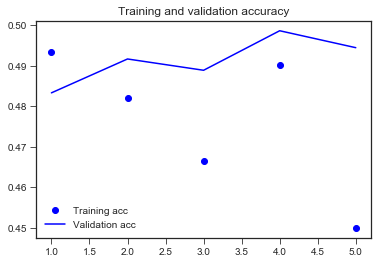

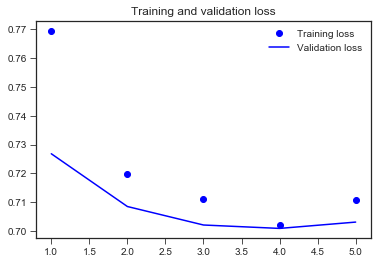

In [85]:
#loss and accuracy curves

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

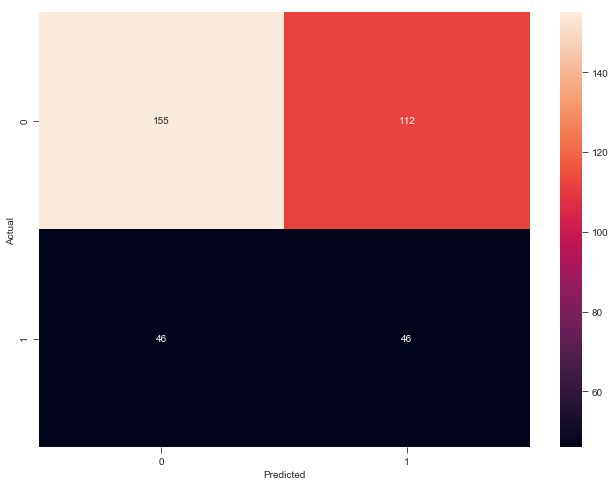

             precision    recall  f1-score   support

          0       0.77      0.58      0.66       267
          1       0.29      0.50      0.37        92

avg / total       0.65      0.56      0.59       359



In [88]:
#predict on X_test
test_probs = model.predict_generator(test_generator)
Y_test_classes = test_probs.argmax(axis=-1) #selects the one with the greatest probability
Y_test_true_classes = Y_test.argmax(axis=-1)
confusion_matrix_maker(model,Y_test_classes,Y_test_true_classes)
print(sklearn.metrics.classification_report(Y_test_classes, Y_test_true_classes, target_names = ['0', '1']))

<h1>InceptionV3 freeze conv base</h1>

- The “Inception” micro-architecture was first introduced by Szegedy et al. in their 2014 paper, Going Deeper with Convolutions
- The goal of the inception module is to act as a “multi-level feature extractor” by computing 1×1, 3×3, and 5×5 convolutions within the same module of the network — the output of these filters are then stacked along the channel dimension and before being fed into the next layer in the network.
- The original incarnation of this architecture was called GoogLeNet
- The weights for Inception V3 are smaller than both VGG and ResNet, coming in at 96MB.
- The Inception V3 architecture included in the Keras core comes from the later publication by Szegedy et al., Rethinking the Inception Architecture for Computer Vision (2015) 

In [89]:
from keras.applications import inception_v3

In [90]:
conv_base = inception_v3.InceptionV3(weights='imagenet', 
                 include_top = False,
                 input_shape = (im_size,im_size,3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

conv_base.trainable = False

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.sgd(lr=0.0001),
              metrics=['acc'])

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 14, 14, 2048)      21802784  
_________________________________________________________________
flatten_8 (Flatten)          (None, 401408)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               102760704 
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 514       
Total params: 124,564,002
Trainable params: 102,761,218
Non-trainable params: 21,802,784
_________________________________________________________________


In [92]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=10,
    validation_data = test_generator,
    validation_steps = 50)

Epoch 1/10
50/50 [==============================] - 92s 2s/step - loss: 0.6944 - acc: 0.5779 - val_loss: 0.6660 - val_acc: 0.6072
Epoch 2/10
50/50 [==============================] - 77s 2s/step - loss: 0.5819 - acc: 0.6987 - val_loss: 0.5908 - val_acc: 0.6978
Epoch 3/10
50/50 [==============================] - 77s 2s/step - loss: 0.5373 - acc: 0.7419 - val_loss: 0.5644 - val_acc: 0.7284
Epoch 4/10
50/50 [==============================] - 78s 2s/step - loss: 0.4822 - acc: 0.7938 - val_loss: 0.5180 - val_acc: 0.7549
Epoch 5/10
50/50 [==============================] - 88s 2s/step - loss: 0.4612 - acc: 0.8045 - val_loss: 0.5090 - val_acc: 0.7702
Epoch 6/10
50/50 [==============================] - 92s 2s/step - loss: 0.4553 - acc: 0.8138 - val_loss: 0.5276 - val_acc: 0.7326
Epoch 7/10
50/50 [==============================] - 80s 2s/step - loss: 0.4159 - acc: 0.8382 - val_loss: 0.4939 - val_acc: 0.7521
Epoch 8/10
50/50 [==============================] - 88s 2s/step - loss: 0.4130 - acc: 0.83

In [93]:
score = model.evaluate_generator(test_generator)
print(score)

[0.5150551114407754, 0.7075208921950508]


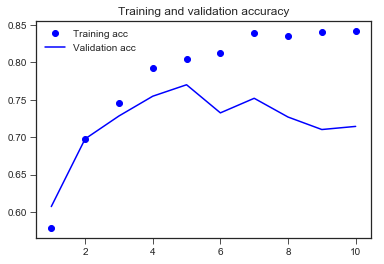

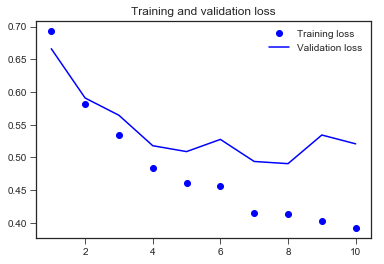

In [94]:
#loss and accuracy curves

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [95]:
model.save('InceptionV3_binary_set_10epochs.h5') 

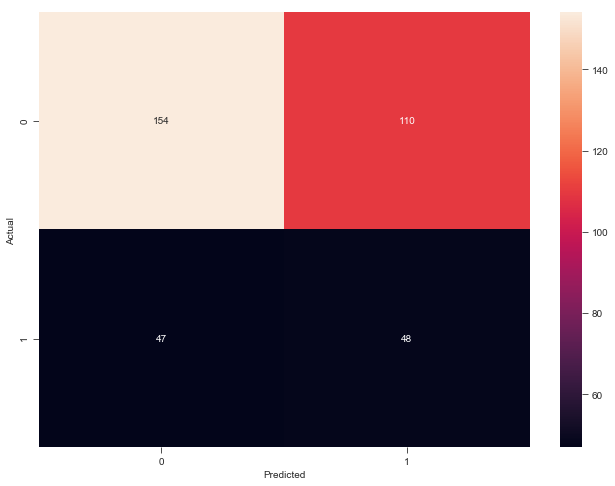

             precision    recall  f1-score   support

          0       0.77      0.58      0.66       264
          1       0.30      0.51      0.38        95

avg / total       0.64      0.56      0.59       359



In [96]:
#predict on X_test
test_probs = model.predict_generator(test_generator)
Y_test_classes = test_probs.argmax(axis=-1) #selects the one with the greatest probability
Y_test_true_classes = Y_test.argmax(axis=-1)
confusion_matrix_maker(model,Y_test_classes,Y_test_true_classes)
print(sklearn.metrics.classification_report(Y_test_classes, Y_test_true_classes, target_names = ['0', '1']))

<h1>InceptionV3 Bottleneck Features</h1>

In [97]:
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [98]:
INPUT_SIZE = im_size
POOLING = 'avg'

<b>Doesn't use the generators, uses numpy arrays from X_train and X_test</b>

In [99]:
inception_bottleneck = inception_v3.InceptionV3(weights='imagenet', include_top=False, pooling=POOLING)

train_i_bf = inception_bottleneck.predict(X_train, batch_size=32, verbose=1)

valid_i_bf = inception_bottleneck.predict(X_valid, batch_size=32, verbose=1)

print('InceptionV3 train bottleneck features shape: {} size: {:,}'.format(train_i_bf.shape, train_i_bf.size))
print('InceptionV3 valid bottleneck features shape: {} size: {:,}'.format(valid_i_bf.shape, valid_i_bf.size))

219/219 [==============================] - 4s 19ms/step
InceptionV3 train bottleneck features shape: (511, 2048) size: 1,046,528
InceptionV3 valid bottleneck features shape: (219, 2048) size: 448,512


In [100]:
SEED = 42
NUM_CLASSES = num_class

In [102]:
#Use Logistic Regression to predict on the features
logreg = LogisticRegression(multi_class='ovr', solver='lbfgs', random_state=SEED)

logreg.fit(train_i_bf, (Y_train * range(NUM_CLASSES)).sum(axis=1))

#predict on validation set to get a baseline
valid_probs = logreg.predict_proba(valid_i_bf)

valid_preds = logreg.predict(valid_i_bf)

print('Validation Inception LogLoss {}'.format(log_loss(Y_valid, valid_probs)))

print('Validation Inception Accuracy {}'.format(accuracy_score((Y_valid * range(NUM_CLASSES)).sum(axis=1), valid_preds)))

Validation Inception LogLoss 0.2571751199246136
Validation Inception Accuracy 0.8812785388127854


<h2>Predictions</h2>

In [103]:
test_i_bf = inception_bottleneck.predict(x_test, batch_size=32, verbose=1)

print('InceptionV3 train bottleneck features shape: {} size: {:,}'.format(test_i_bf.shape, test_i_bf.size))

359/359 [==============================] - 5s 14ms/step
InceptionV3 train bottleneck features shape: (359, 2048) size: 735,232


In [104]:
#predict on X_test
test_probs = logreg.predict_proba(test_i_bf)
test_preds = logreg.predict(test_i_bf)

In [105]:
#generate df

proba_df = pd.DataFrame(test_probs)
proba_df.columns = one_hot.columns
print(proba_df.head())

       NONE      PAIN
0  0.998865  0.001135
1  0.989479  0.010521
2  0.766664  0.233336
3  0.807209  0.192791
4  0.978954  0.021046


<b>You only need to run this once.</b>

In [106]:
data=[]
for filename in sorted(os.listdir('new_face_2/test')):
        data.append((filename))

df = pd.DataFrame(data, columns=['File'])
df.head() #df is the x_test data

,File
0,0003_00000001.jpg
1,0004_1.jpg
2,0005_17.jpg
3,0007_003.jpg
4,0008_002.jpg


In [107]:
sample_predictions = pd.concat([df, proba_df], axis=1)
sample_predictions.head(25)

,File,NONE,PAIN
0,0003_00000001.jpg,0.998865,0.001135
1,0004_1.jpg,0.989479,0.010521
2,0005_17.jpg,0.766664,0.233336
3,0007_003.jpg,0.807209,0.192791
4,0008_002.jpg,0.978954,0.021046
5,12b.jpg,0.999537,0.000463
6,13b.jpg,0.992517,0.007483
7,15b.jpg,0.997696,0.002304
8,16a.jpg,0.998016,0.001984
9,16b.jpg,0.999899,0.000101


In [108]:
#confusion matrix
Y_test_classes = test_probs.argmax(axis=-1) #selects the one with the greatest probability

print(Y_test_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1]


In [109]:
Y_test_true_classes = Y_test.argmax(axis=-1)
Y_test_true_classes 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,

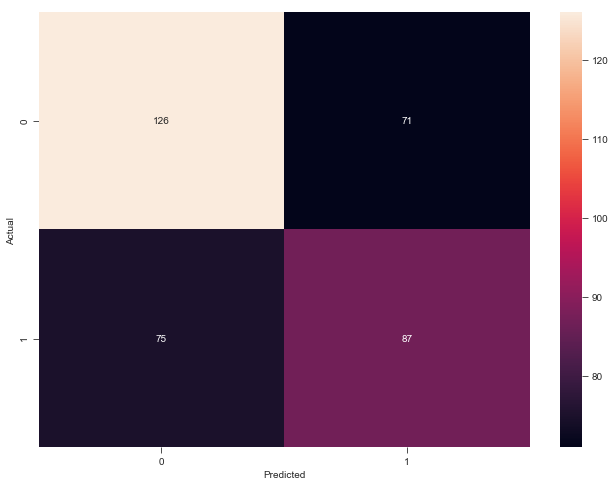

In [110]:
confusion_matrix_maker(model,Y_test_classes,Y_test_true_classes)

In [111]:
print(sklearn.metrics.classification_report(Y_test_classes, Y_test_true_classes, target_names = ['0', '1']))

             precision    recall  f1-score   support

          0       0.63      0.64      0.63       197
          1       0.55      0.54      0.54       162

avg / total       0.59      0.59      0.59       359



In [112]:
#save
from sklearn.externals import joblib
joblib.dump(logreg, 'logreg_inception_bottleneck_sklearn_binary.joblib') 

['logreg_inception_bottleneck_sklearn_binary.joblib']

<h1>Xception free conv base</h1>

In [113]:
#Xception model 
from keras.applications import xception

In [114]:
conv_base = xception.Xception(weights='imagenet', 
                 include_top = False,
                 input_shape = (im_size,im_size,3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

conv_base.trainable = False

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.sgd(lr=0.01),
              metrics=['acc'])

In [115]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=10,
    validation_data = test_generator,
    validation_steps = 50)

Epoch 1/10
50/50 [==============================] - 137s 3s/step - loss: 0.6420 - acc: 0.7250 - val_loss: 0.4123 - val_acc: 0.8677
Epoch 2/10
50/50 [==============================] - 124s 2s/step - loss: 0.4201 - acc: 0.8181 - val_loss: 0.3855 - val_acc: 0.8719
Epoch 3/10
50/50 [==============================] - 120s 2s/step - loss: 0.3358 - acc: 0.8710 - val_loss: 0.3695 - val_acc: 0.8510
Epoch 4/10
50/50 [==============================] - 123s 2s/step - loss: 0.3490 - acc: 0.8568 - val_loss: 0.4845 - val_acc: 0.7340
Epoch 5/10
50/50 [==============================] - 125s 2s/step - loss: 0.2974 - acc: 0.8840 - val_loss: 0.4773 - val_acc: 0.7075
Epoch 6/10
50/50 [==============================] - 124s 2s/step - loss: 0.3290 - acc: 0.8721 - val_loss: 0.4245 - val_acc: 0.7591
Epoch 7/10
50/50 [==============================] - 122s 2s/step - loss: 0.2820 - acc: 0.8910 - val_loss: 0.4610 - val_acc: 0.7437
Epoch 8/10
50/50 [==============================] - 121s 2s/step - loss: 0.2800 - a

In [116]:
model.save('Xception_binary_set_10epochs.h5') 

In [117]:
score = model.evaluate_generator(test_generator)
print(score)

[0.44670591978641605, 0.7632312062390999]


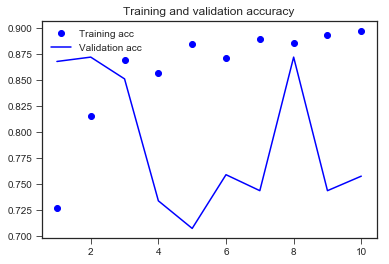

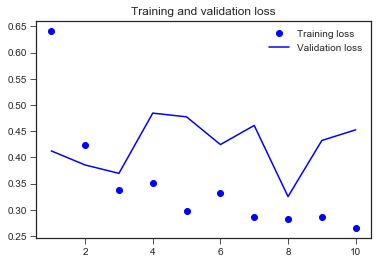

In [118]:
#loss and accuracy curves

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

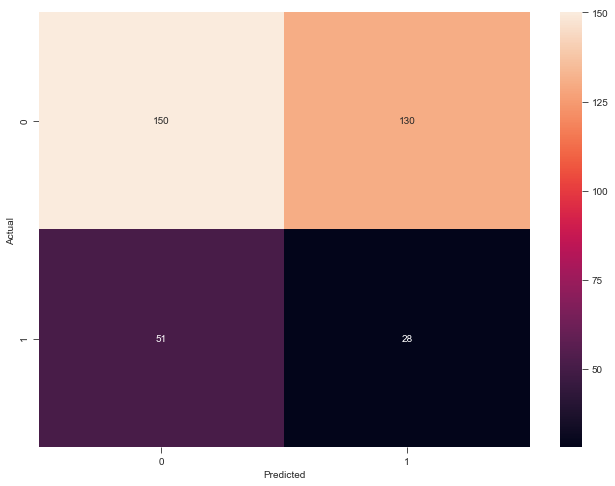

             precision    recall  f1-score   support

          0       0.75      0.54      0.62       280
          1       0.18      0.35      0.24        79

avg / total       0.62      0.50      0.54       359



In [119]:
#predict on X_test
test_probs = model.predict_generator(test_generator)
Y_test_classes = test_probs.argmax(axis=-1) #selects the one with the greatest probability
Y_test_true_classes = Y_test.argmax(axis=-1)
confusion_matrix_maker(model,Y_test_classes,Y_test_true_classes)
print(sklearn.metrics.classification_report(Y_test_classes, Y_test_true_classes, target_names = ['0', '1']))

<h1>Xception Bottleneck Features</h1>

- Xception was proposed by none other than François Chollet himself,Xception: Deep Learning with Depthwise Separable Convolutions (2017)
- Xception sports the smallest weight serialization at only 91MB.

In [120]:
xception_bottleneck = xception.Xception(weights='imagenet', include_top=False, pooling=POOLING)
train_x_bf = xception_bottleneck.predict(X_train, batch_size=32, verbose=1)
valid_x_bf = xception_bottleneck.predict(X_valid, batch_size=32, verbose=1)
print('Xception train bottleneck features shape: {} size: {:,}'.format(train_x_bf.shape, train_x_bf.size))
print('Xception valid bottleneck features shape: {} size: {:,}'.format(valid_x_bf.shape, valid_x_bf.size))

219/219 [==============================] - 5s 25ms/step
Xception train bottleneck features shape: (511, 2048) size: 1,046,528
Xception valid bottleneck features shape: (219, 2048) size: 448,512


In [122]:
SEED = 42
NUM_CLASSES = num_class
#Use Logistic Regression to predict on the features
logreg = LogisticRegression(multi_class='ovr', solver='lbfgs', random_state=SEED)
logreg.fit(train_x_bf, (Y_train * range(NUM_CLASSES)).sum(axis=1))
#predict on validation set to get a baseline
valid_probs = logreg.predict_proba(valid_x_bf)
valid_preds = logreg.predict(valid_x_bf)
print('Validation Xception LogLoss {}'.format(log_loss(Y_valid, valid_probs)))
print('Validation Xception Accuracy {}'.format(accuracy_score((Y_valid * range(NUM_CLASSES)).sum(axis=1), valid_preds)))

Validation Xception LogLoss 0.2379842158769626
Validation Xception Accuracy 0.91324200913242


In [123]:
from sklearn.externals import joblib
joblib.dump(logreg, 'logreg_xception_bottleneck_sklearn_binary.joblib') 


['logreg_xception_bottleneck_sklearn_binary.joblib']

In [ ]:
logreg.__getstate__()['_sklearn_version']

In [ ]:
import pickle

outfile = open('logreg_xception_bottleneck','wb')
pickle.dump(logreg, outfile)
outfile.close()

"""
infile = open(filename,'rb')
new_dict = pickle.load(infile)
infile.close()
"""

In [ ]:
import pickle

infile = open('logreg_xception_bottleneck','rb')
logreg = pickle.load(infile)
infile.close()

In [ ]:
logreg

<h2>Predictions</h2>

In [124]:
test_x_bf = xception_bottleneck.predict(x_test, batch_size=32, verbose=1)
print('Xception train bottleneck features shape: {} size: {:,}'.format(test_x_bf.shape, test_x_bf.size))

359/359 [==============================] - 8s 23ms/step
Xception train bottleneck features shape: (359, 2048) size: 735,232


In [125]:
#predict on X_test using Logistic Regression
test_probs = logreg.predict_proba(test_x_bf)
test_preds = logreg.predict(test_x_bf)

In [126]:
proba_df = pd.DataFrame(test_probs)
proba_df.columns = one_hot.columns
print(proba_df.head())

       NONE      PAIN
0  0.999667  0.000333
1  0.961236  0.038764
2  0.791681  0.208319
3  0.598125  0.401875
4  0.949523  0.050477


In [127]:
sample_predictions = pd.concat([df, proba_df], axis=1)
sample_predictions.head(25)

,File,NONE,PAIN
0,0003_00000001.jpg,0.999667,0.000333
1,0004_1.jpg,0.961236,0.038764
2,0005_17.jpg,0.791681,0.208319
3,0007_003.jpg,0.598125,0.401875
4,0008_002.jpg,0.949523,0.050477
5,12b.jpg,0.981982,0.018018
6,13b.jpg,0.992961,0.007039
7,15b.jpg,0.996752,0.003248
8,16a.jpg,0.992542,0.007458
9,16b.jpg,0.998687,0.001313


In [128]:
#confusion matrix

#the predicted classes

Y_test_classes = test_probs.argmax(axis=-1) #selects the one with the greatest probability
print(Y_test_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1]


In [129]:
#the true value actual classes from Y_test

Y_test_true_classes = Y_test.argmax(axis=-1)
Y_test_true_classes 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,

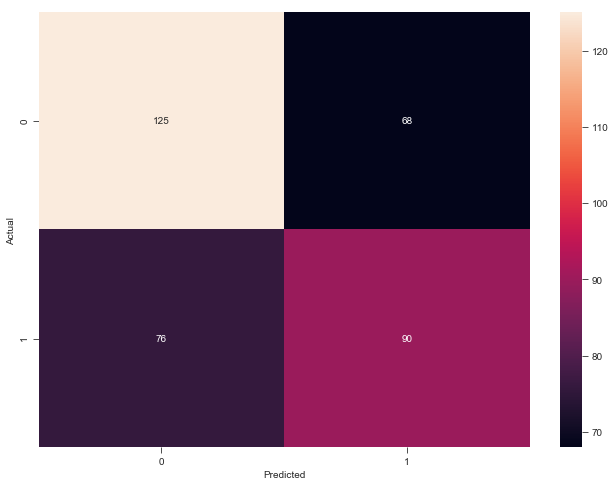

In [130]:
confusion_matrix_maker(model,Y_test_classes,Y_test_true_classes)

In [131]:
print(sklearn.metrics.classification_report(Y_test_classes, Y_test_true_classes, target_names = ['0', '1', '2']))

             precision    recall  f1-score   support

          0       0.62      0.65      0.63       193
          1       0.57      0.54      0.56       166

avg / total       0.60      0.60      0.60       359



/home/cordun/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 3
  .format(len(labels), len(target_names))


<h1>My own image predictions</h1>

In [132]:
im_size = 500

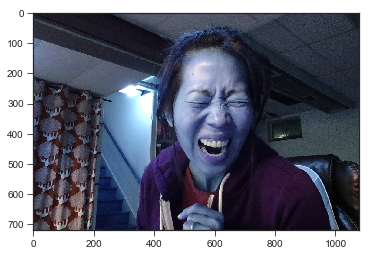

In [133]:
##YOU MAY TEST WITH THIS
"""
1 - cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
0 - cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
-1 - cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel


"""
input_face = cv2.imread('cat_4.jpg', 1)
#show it
plt.imshow(input_face)
plt.show()


In [134]:
face_re = cv2.resize(input_face,(im_size,im_size), interpolation=cv2.INTER_CUBIC)

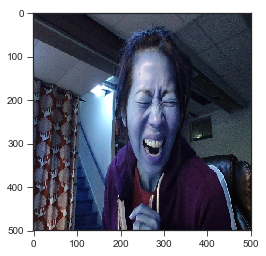

In [135]:
plt.imshow(face_re)
plt.show()

In [136]:
face_arr= np.array(face_re, np.float32) / 255.

In [137]:
face_arr

array([[[0.10980392, 0.09803922, 0.10588235],
        [0.08627451, 0.07450981, 0.08235294],
        [0.11372549, 0.10980392, 0.1254902 ],
        ...,
        [0.10196079, 0.10980392, 0.14901961],
        [0.07843138, 0.08627451, 0.1254902 ],
        [0.10588235, 0.11372549, 0.15294118]],

       [[0.08627451, 0.08235294, 0.08627451],
        [0.06666667, 0.05882353, 0.07058824],
        [0.09803922, 0.09411765, 0.10980392],
        ...,
        [0.10196079, 0.10980392, 0.14901961],
        [0.09019608, 0.09803922, 0.13725491],
        [0.12156863, 0.12941177, 0.16862746]],

       [[0.06666667, 0.0627451 , 0.07843138],
        [0.0627451 , 0.05882353, 0.07450981],
        [0.09019608, 0.09019608, 0.10588235],
        ...,
        [0.11372549, 0.12156863, 0.16078432],
        [0.06666667, 0.07450981, 0.11372549],
        [0.11372549, 0.12156863, 0.16078432]],

       ...,

       [[0.32156864, 0.31764707, 0.38039216],
        [0.31764707, 0.3137255 , 0.3764706 ],
        [0.28235295, 0

In [138]:
face_arr.shape

(500, 500, 3)

In [139]:
face_arr2 = np.expand_dims(face_arr, axis=0)
face_arr2.shape

(1, 500, 500, 3)

In [140]:
INPUT_SIZE = im_size
POOLING = 'avg'
xception_bottleneck = xception.Xception(weights='imagenet', include_top=False, pooling=POOLING)

In [141]:
#apply bottleneck features for this test image
test_face_bf = xception_bottleneck.predict(face_arr2, batch_size=32, verbose=1)
print('Xception train bottleneck features shape: {} size: {:,}'.format(test_face_bf.shape, test_face_bf.size))

1/1 [==============================] - 4s 4s/step
Xception train bottleneck features shape: (1, 2048) size: 2,048


In [142]:
#predict on X_test using Logistic Regression
my_image_test_probs = logreg.predict_proba(test_face_bf)
my_image_test_preds = logreg.predict(test_face_bf)

In [143]:
my_image_test_probs

array([[0.65735545, 0.34264455]])

In [144]:
my_image_test_preds

array([0])

In [145]:
print('Xception test prediction for this image is: {}'.format(my_image_test_preds))

Xception test prediction for this image is: [0]


<h2>Load Model</h2>

In [2]:
from keras.models import load_model

In [3]:
model = load_model('/Users/559048/Documents/Scripts/face/models/InceptionV3_binary_set_10epochs.h5')

/Users/559048/anaconda2/envs/py36/lib/python3.6/site-packages/keras/engine/saving.py:304: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [11]:
#function 

#model_bottleneck = 'xception_bottleneck'
im_size = 500 

def my_image_ready(file):
    input_face = cv2.imread(file, 1) #read in color
    #show it
    plt.imshow(input_face)
    plt.show()
    
    face_re = cv2.resize(input_face,(im_size,im_size), interpolation=cv2.INTER_CUBIC) #resize
    face_arr= np.array(face_re, np.float32) / 255. #normalize
    
    face_arr2 = np.expand_dims(face_arr, axis=0) #only one pic, one sample, so expand dims to turn into 4D array
    print(face_arr2.shape)
    return(face_arr2)

def my_image_pred_bottleneck(array, model, logreg):
    #apply bottleneck features for this test image
    test_face_bf = model.predict(array, batch_size=32, verbose=1)
    
    #predictions
    my_image_test_probs = logreg.predict_proba(test_face_bf)
    my_image_test_preds = logreg.predict(test_face_bf)
    print('Model test prediction for this image is: {}'.format(my_image_test_preds))

def my_image_pred(array, model):
    #apply bottleneck features for this test image
    my_image_test_preds = model.predict(array, batch_size=32, verbose=1)
    print('Model test prediction for this image is: {}'.format(my_image_test_preds.argmax(axis=-1)))



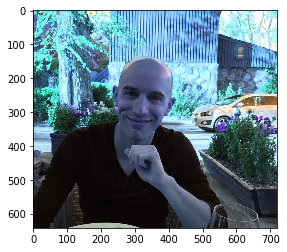

(1, 500, 500, 3)


In [6]:
#file = 'cat_4.jpg'
#model_bottleneck = 'xception_bottleneck'
iarr = my_image_ready('/Users/559048/Documents/Scripts/face/images/example_01.jpg')

In [12]:
my_image_pred(iarr, model)

1/1 [==============================] - 0s 493ms/step
Model test prediction for this image is: [0]


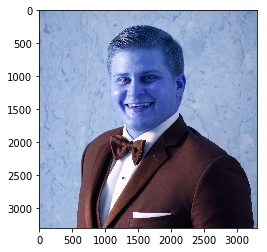

(1, 500, 500, 3)


In [13]:
#another one
iarr = my_image_ready('/Users/559048/Documents/Scripts/face/images/example_07.jpg')

In [14]:
my_image_pred(iarr, model)

1/1 [==============================] - 0s 488ms/step
Model test prediction for this image is: [0]


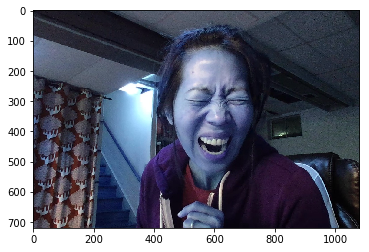

(1, 500, 500, 3)


In [17]:
#another one
iarr = my_image_ready('/Users/559048/Documents/Scripts/face/images/cat_4.jpg')

In [18]:
my_image_pred(iarr, model)

1/1 [==============================] - 0s 480ms/step
Model test prediction for this image is: [0]
